# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** [Marcelo Coronel]  
**Date:** [9/14/2025]  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [33]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
setwd('/workspaces/assignment-2-version3-coronelmm/data')
getwd()


[1] "/workspaces/assignment-2-version3-coronelmm/data"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [34]:
# Import the messy sales dataset
messy_sales <- read_csv("messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
cat("Column names:", paste(names(messy_sales), collapse = ", "), "\n")

Rows: 200 Columns: 6


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity 


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [35]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


In [36]:
# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

[1] "=== DATA STRUCTURE ==="
spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [TransactionID has an NA in the first row, Purchase_Date has an NA in the first row too]

2. **Potential Outliers:** [Sales_Amount has an unusually large value of 5000.00 compared to the others that are mostly in the hundreds. 
Quantity has a -1 value a 0 (though it was still charged) and 100 which is large compared to the other quantities that are around 1-7 ]

3. **Data Inconsistencies:** [There is inconsistency in the capitalization of "Electronics" vs "electronics".
Could potentially cause issues when grouping or analyzing.]

4. **Data Types:** [Purchase_Date is using <date> which is correct and Sales_Amount is using <dbl> which is also correct.
However, TransactionID is using <dbl> but might be better stored as <chr> since it is an identifier.]

5. **Invalid Values:** [Quantity has a -1 value and you probably cant purchase a negative quantity of an item.
Quantity also has a 0 value which is strange since it was still charged.]



---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [37]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- sapply(messy_sales, function(x) sum(is.na(x)))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"


   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"
# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8            41 NA            ELECTRONICS              789. 2023-

### 2.2 Missing Value Treatment - Option A (Removal)


Create a dataset with all missing value rows removed and compare the results.

In [38]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6


[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [39]:
## Create a copy for imputation
sales_imputed <- messy_sales

print(sales_imputed, width = Inf)


# A tibble: 200 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2             2 Alice Brown   Clothing                 573. 2023-10-21   
 3             3 Jane Doe      Electronics              488. 2023-12-28   
 4             4 Jane Doe      Electronics             5000  2023-06-16   
 5             5 John Smith    Books                    344. 2023-05-05   
 6             6 John Smith    Books                    435. 2023-11-28   
 7             7 Jane Doe      Home                     489. 2023-08-17   
 8             8 Jane Doe      Electronics              537. 2023-05-17   
 9             9 Jane Doe      Clothing                 793. 2023-08-13   
10            10 Jane Doe      electronics              649. 2023-10-16   
   Quantity
      <dbl>
 1        2
 2        3
 3       -1
 4        7
 5      

In [40]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}


In [41]:
### TODO: Impute Customer_Name with mode (for categorical missing values)

sales_imputed$Customer_Name <- as.character(sales_imputed$Customer_Name)
mode_name <- get_mode(sales_imputed$Customer_Name)
sales_imputed$Customer_Name[is.na(sales_imputed$Customer_Name)] <- mode_name

print("After imputing Customer_Name with mode:")
print(mode_name)
print(sales_imputed$Customer_Name)

#  I originally tried this approach but it didn't work - mutate error so I asked copilot to help
#   sales_imputed$Customer_Name <- sales_imputed %>%
#       mutate(Customer_Name = ifelse
#       (is.na(Customer_Name), 
#       get_mode(Customer_Name), Customer_Name))


[1] "After imputing Customer_Name with mode:"
[1] "John Smith"
  [1] "John Smith"  "Alice Brown" "Jane Doe"    "Jane Doe"    "John Smith" 
  [6] "John Smith"  "Jane Doe"    "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [11] "Bob Johnson" "John Smith"  "Jane Doe"    "Alice Brown" "John Smith" 
 [16] "Bob Johnson" "Alice Brown" "John Smith"  "Jane Doe"    "Jane Doe"   
 [21] "John Smith"  "Bob Johnson" "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [26] "John Smith"  "Alice Brown" "Jane Doe"    "Alice Brown" "Alice Brown"
 [31] "Jane Doe"    "John Smith"  "Bob Johnson" "Alice Brown" "John Smith" 
 [36] "Jane Doe"    "Bob Johnson" "Bob Johnson" "John Smith"  "Alice Brown"
 [41] "John Smith"  "Alice Brown" "Bob Johnson" "John Smith"  "Jane Doe"   
 [46] "John Smith"  "John Smith"  "Alice Brown" "John Smith"  "Jane Doe"   
 [51] "John Smith"  "John Smith"  "Alice Brown" "Alice Brown" "Alice Brown"
 [56] "Bob Johnson" "John Smith"  "Bob Johnson" "Bob Johnson" "Jane Doe"   
 [61] "John Smith"  "John

In [42]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
median_qty <- median(sales_imputed$Quantity, na.rm = TRUE)

quantity_imputed_median <- sales_imputed %>%
mutate(Quantity_imputed_median = ifelse(is.na(Quantity),
median_qty,
Quantity))

print(median_qty)
print("After imputing Quantity with median:")
print(sales_imputed$Quantity)

[1] 5
[1] "After imputing Quantity with median:"
  [1]   2   3  -1   7 100   4   0   7   3   2   5   7 100 100   2   4 100   8
 [19]   4   6   8   0   2   8   1   4 100   6   2   8  10   2   5  -1  10   0
 [37]  10   7   8   3   4   0   4   2  10   0   6  -1   1   0  -1  -1   7  -1
 [55]   4   8   4   7   1   3   2   5   5   3 100 100   0   0   9  -1 100   0
 [73]   5 100  10   6   3   0   0   2   7   0  10   3   9   5   1   2   5 100
 [91]  -1   5   5   2   2  10   5  -1  10   7 100   2   7   8   3   5  10   3
[109]  10   9   5   8   4 100   1   4   0   7   8   2   4   5   7  -1   1  10
[127]   3   7   4   8  10  10   7   1   9   2  10   0   4   7   5   6   2   0
[145]   9   6 100   7   3   5   7   9   2   8  -1   5   0  10  10 100   3  -1
[163]   0   1   1   4  -1   0   5  10 100   5   3   2   9   3  -1   7   5  10
[181]   5 100   7  10   8  -1   1   8   3  -1   7   3   2   3   7   2  10   9
[199] 100  10


In [43]:
###Inserting Median Imputation of Sales Amount
median_sales <- median(sales_imputed$Sales_Amount, na.rm = TRUE)

sales_imputed <- sales_imputed %>%
mutate(Sales_Amount = ifelse(is.na(Sales_Amount),
median_sales,
Sales_Amount))

print(median_sales)
print("After imputing Sales_Amount with median:")
print(sales_imputed$Sales_Amount)

[1] 531.2922
[1] "After imputing Sales_Amount with median:"
  [1]    362.31745    573.07908    487.68744   5000.00000    344.17461
  [6]    434.95266    489.08635    536.92019    793.39330    649.42865
 [11]    595.72472    742.61228    730.36859    675.62967    360.03699
 [16]    246.26551    309.79852    531.29223    343.87469    715.32581
 [21]    483.11799    455.58456    531.29223    690.48218    334.70565
 [26]    531.22891    604.59384    689.91677    549.75283    410.87530
 [31]    714.76140    313.95136    430.86480    564.04271    863.49333
 [36]    759.72988    442.95419    888.19199    801.93558    440.76240
 [41]    788.74566    453.04844    531.29223    583.29064    531.29223
 [46]   8000.00000    726.03517    531.29223    506.81020    734.26616
 [51]    288.46938    777.83666    469.85278    577.20015    519.89664
 [56]    835.17601    824.89897    531.29223    613.65223    615.29837
 [61]    531.29223    565.88355    410.04333    496.45877    768.45017
 [66]    734.4958

In [44]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0                0 
   Purchase_Date         Quantity 
              14                0 


#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [45]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [46]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount,)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [47]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -100.0    388.7    531.3   1495.7    676.6 100000.0 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

For this data set I would recommend using imputation. Removing rows with NAs reduces the sample size and makes the dataset more biased toward extreme values. Median imputation preserves all records while replacing missing values with a stable, representative statistic that is less affected by some of the extreme outliers.

1. **What are the trade-offs between removal and imputation?**

With removal you are losing data and potentially losing important information. With imputation you are keeping all the data but you are introducing some bias since you are replacing missing values with more center-like estimates.

---

### Part 3: Outlier Detection and Treatment

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

#### 3.1 Outlier Detection Using IQR Method


Apply the interquartile range method to identify outliers in Sales_Amount.

In [48]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25,na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75,na.rm = TRUE)
IQR_sales <- Q3_sales - Q1_sales

In [49]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales   
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [50]:
### TODO: Identify outliers
outliers <- sales_imputed %>%
filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 388.682614133283"
[1] "Q3: 676.620099081539"
[1] "IQR: 287.937484948256"
[1] "Lower threshold: -43.2236132891001"
[1] "Upper threshold: 1108.52632650392"
[1] "Number of outliers found: 8"
[1] "Outlier rows:"


# A tibble: 8 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 Jane Doe      Electronics            5000   2023-06-16   
2            46 John Smith    Books                  8000   NA           
3            96 John Smith    electronics           50000   2023-09-22   
4           121 John Smith    Electronics            -100   NA           
5           140 Jane Doe      Clothing                -56.7 2023-07-20   
6           146 John Smith    ELECTRONICS           12000   2023-01-22   
7           167 Bob Johnson   Electronics          100000   2023-09-18   
8           177 Jane Doe      ELECTRONICS           25000   2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

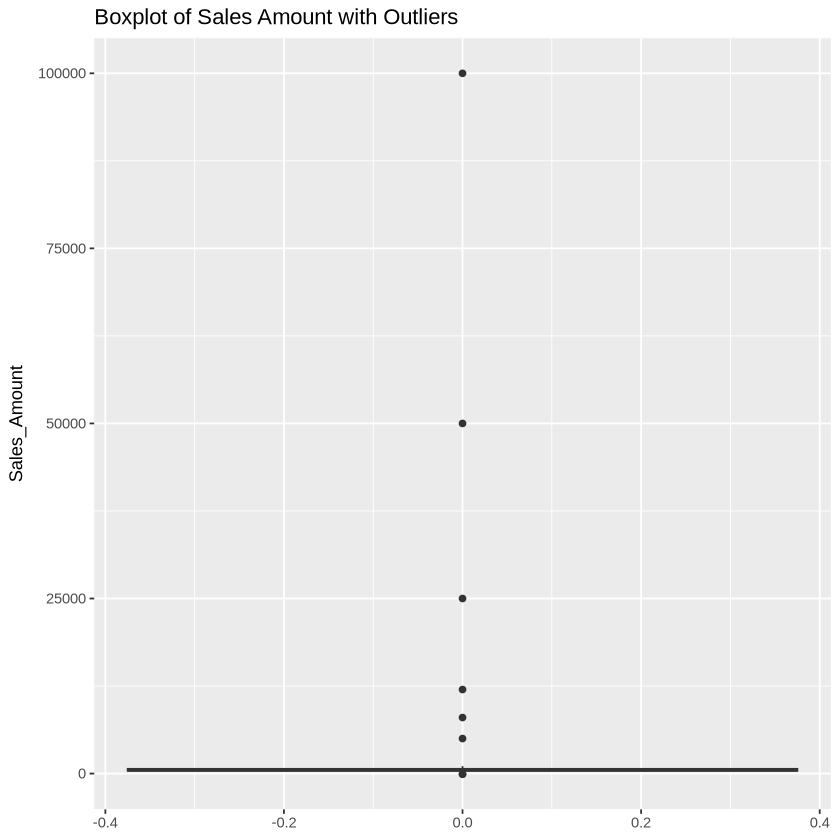

In [51]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
geom_boxplot() +
ggtitle("Boxplot of Sales Amount with Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

[1] "Original rows: 200"


[1] "After removing outliers: 192"
[1] "Rows removed: 8"


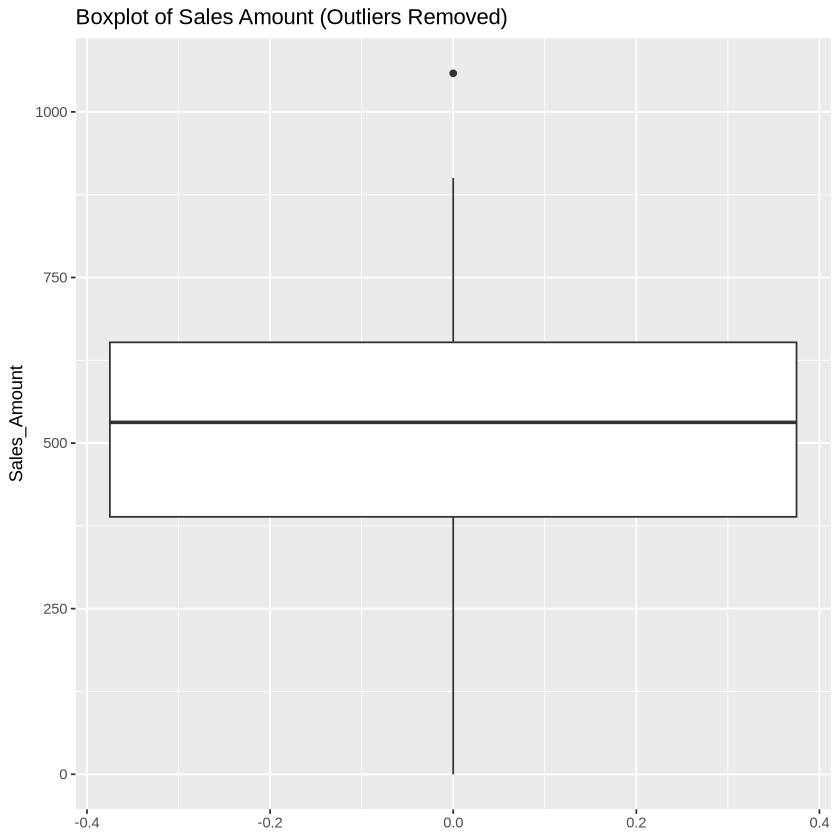

In [52]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

boxplot_sales_removed <- ggplot(sales_outliers_removed, aes(y = Sales_Amount)) +
  geom_boxplot() +
  ggtitle("Boxplot of Sales Amount (Outliers Removed)")

print(boxplot_sales_removed)


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

In [53]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [54]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped <- sales_outliers_capped %>%
  mutate(Sales_Amount = ifelse(
    Sales_Amount > upper_threshold, upper_threshold,
    ifelse(Sales_Amount < lower_threshold, lower_threshold, Sales_Amount)
  ))

In [55]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"


[1]  -43.22361 1108.52633


[1] "Remaining outliers after capping: 0"


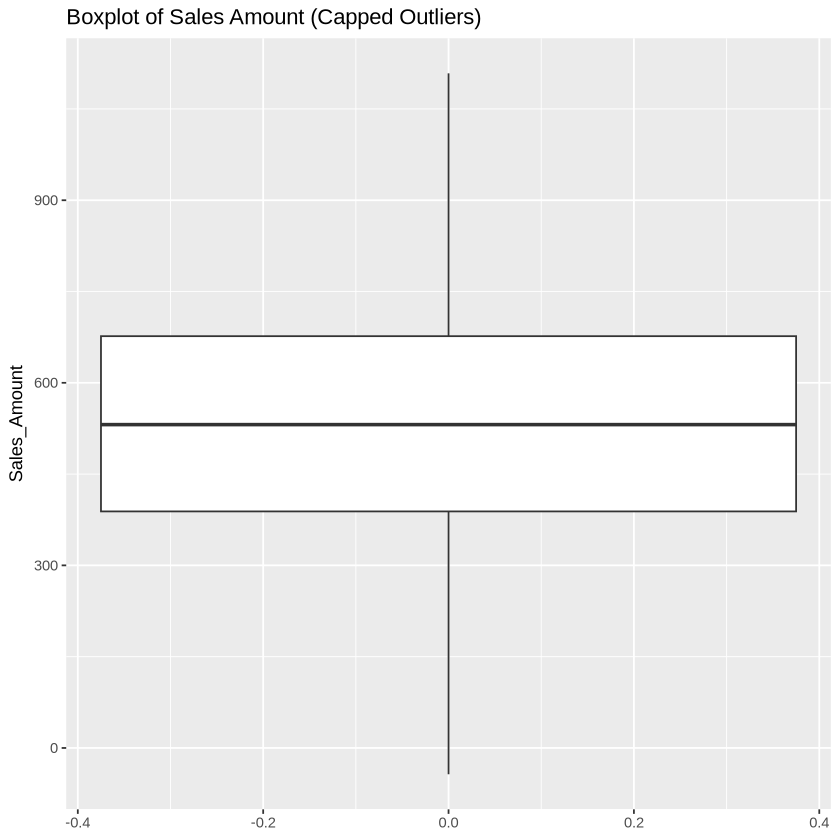

In [56]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

boxplot_sales_capped <- ggplot(sales_outliers_capped, aes(y = Sales_Amount)) +
  geom_boxplot() +
  ggtitle("Boxplot of Sales Amount (Capped Outliers)")

print(boxplot_sales_capped)

---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [61]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -43.22  388.68  531.29  529.32  676.62 1108.53 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

I chose the capped outliers dataset because it preserves all the data points while reducing the impact of extreme outliers. This approach maintains the sample size but also ensures that outliers don't skew the quality of the data too much. This is important for business analysis as it provides a more accurate representation of typical sales amounts while still having an accurate picture of the overall data distribution. As far as analysis requirements, this dataset is more robust and reliable for statistical analysis and modeling. The boxplot is very quick and easy to understand and interpret.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [62]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric  Original_Data     Final_Data
1      Number of Rows            200            200
2      Missing Values             52             14
3   Mean Sales_Amount        1614.91         529.32
4 Median Sales_Amount         531.29         531.29
5            Outliers Check manually Check manually


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

I would remove rows with missing values in cases where the missing data is rare and does not affect critical metrics. For example, if only a handful of customer survey responses are missing contact information out of thousands collected, dropping them will not change the overall analysis. On the other hand, I would impute missing values when the gaps occur in variables that directly impact business performance. For instance, if a significant portion of sales records are missing the Quantity field, imputing with the median allows the dataset to remain intact so that revenue totals, inventory planning, and forecasting can remain accurate.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

Outliers in the Sales_Amount column could represent several different scenarios. In some cases, they might reflect legitimate bulk purchases, such as a company ordering hundreds of units in a single transaction. In other cases, they might be the result of errors, such as an extra zero added to a sales figure that turned a $1,000 purchase into $100,000. These values should not always be removed automatically; if they represent true business events, they carry important insights about customer behavior and operational processes. However, if they are clearly data entry errors, they should be capped or corrected to prevent them from distorting the overall analysis.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

The presence of missing values and outliers can have a major effect on business analytics tasks. If Quantity is missing for many transactions, total revenue and demand calculations will be underestimated, which could mislead managers into understocking inventory. Outliers in Sales_Amount can inflate the average order value, giving decision-makers a false sense of performance and masking typical customer behavior. They can also disrupt rankings of top-performing products or regions, allowing a single extreme transaction to outweigh consistent sales patterns. In forecasting, both missing values and extreme outliers can cause predictive models to overreact, leading to forecasts that either underestimate or overestimate future demand.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

Cleaning data always carries ethical implications because the choices analysts make can shape the story the data tells. Removing or modifying data without documentation can bias results, exaggerate performance, or hide potential issues from leadership. To maintain transparency and integrity, analysts should carefully document each cleaning step and explain the reasoning behind it, such as why sales above the 99th percentile were capped or why the median was used to replace missing quantities. In practice, this might mean showing both the raw data and the cleaned dataset so stakeholders understand what has been changed.

I think one should strive for accuracy and honesty in data representation. This way we can ensure that the truth is what is guiding business decisions, not an idealized version of it.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**